<a href="https://colab.research.google.com/github/Matheus-SF/spotify_insights_EDA_clustering_ML/blob/main/notebooks/Spotify_EDA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spotify Insights: EDA + Clustering + ML

Meu objetivo neste projeto é entender padrões de músicas, obter insights sobre as músicas que compõem as top posições do ranking.
Além disso, pretendo também classificar as músicas através de clusters para identificar padrões com base no número de streams.
Por fim, irei criar um modelo com regressão linear para verificar se é possível prever se uma música obterá ou não sucesso nos rankings.

base: https://www.kaggle.com/datasets/edumucelli/spotifys-worldwide-daily-song-ranking/data

A base é composta por rankings globais coletados diariamente durante o ano de 2017.

## Métodos Utilizados

##1. EDA

* **Visualizações com `ggplot2`**: Utilizadas para identificar tendências de distribuição de `Streams`, posições (`Position`) e frequência por artistas.
* **Análise temporal**: Observamos a evolução das faixas ao longo do tempo para identificar padrões e sazonalidades.
* **Ranking por artistas**: Identificação dos artistas mais recorrentes no top 100.
* **Análise de correlação**: Explorei a relação entre número de streams e posição no ranking, mostrando forte correlação negativa (quanto maior o número de streams, melhor a posição).

---

##2. Clusterização

Foi realizada a técnica de **K-Means Clustering** com base nas variáveis **Position** e **Streams**, a fim de segmentar as músicas em grupos com comportamentos similares.

* **Normalização**: Os dados foram padronizados para evitar viés devido à escala.
* **Elbow Method**: Utilizado para identificar o número ideal de clusters (sugerindo 3 ou 4).
* **Clusters interpretados** como:

  * Cluster 1: Músicas com poucos streams e baixa posição.
  * Cluster 2: Faixas medianas em performance.
  * Cluster 3: Faixas de altíssimo desempenho, geralmente nas primeiras posições e com alto número de reproduções.

---

## 3. Machine Learning

Utilizou-se **Regressão Logística** para prever se uma música tem chance de ser considerada um **"sucesso"** com base no número de **Streams**:

* **Definição de variável resposta (`Sucesso`)**: Criada a partir de um critério (por exemplo, estar entre as 100 primeiras posições).
* **Divisão dos dados em treino e teste (80/20)**.
* **Modelo de regressão logística binária**:

  * Modelo treinado com `Streams` como variável explicativa.
  * Acurácia e desempenho avaliados via **matriz de confusão** e **AUC**.
  * Resultado: **AUC ≈ 0.70**, indicando desempenho aceitável para prever se uma música será ou não um sucesso com base apenas na quantidade de streams.



In [5]:
spotify <- read.csv("/content/data.csv")

In [3]:
install.packages("ggplot2", quiet = TRUE)
install.packages("dplyr", quiet = TRUE)
install.packages("corrplot", quiet = TRUE)

In [4]:
library(ggplot2)
library(dplyr)
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.95 loaded



In [ ]:
summary(spotify)

    Position       Track.Name           Artist             Streams        
 Min.   :  1.00   Length:3441197     Length:3441197     Min.   :    1001  
 1st Qu.: 45.00   Class :character   Class :character   1st Qu.:    3322  
 Median : 92.00   Mode  :character   Mode  :character   Median :    9227  
 Mean   : 94.64                                         Mean   :   51892  
 3rd Qu.:143.00                                         3rd Qu.:   29658  
 Max.   :200.00                                         Max.   :11381520  
     URL                Date              Region         
 Length:3441197     Length:3441197     Length:3441197    
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

In [ ]:
str(spotify)

'data.frame':	3441197 obs. of  7 variables:
 $ Position  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Track.Name: chr  "Reggaetón Lento (Bailemos)" "Chantaje" "Otra Vez (feat. J Balvin)" "Vente Pa' Ca" ...
 $ Artist    : chr  "CNCO" "Shakira" "Zion & Lennox" "Ricky Martin" ...
 $ Streams   : int  19272 19270 15761 14954 14269 12843 10986 10653 9807 9612 ...
 $ URL       : chr  "https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTfo" "https://open.spotify.com/track/6mICuAdrwEjh6Y6lroV2Kg" "https://open.spotify.com/track/3QwBODjSEzelZyVjxPOHdq" "https://open.spotify.com/track/7DM4BPaS7uofFul3ywMe46" ...
 $ Date      : chr  "2017-01-01" "2017-01-01" "2017-01-01" "2017-01-01" ...
 $ Region    : chr  "ec" "ec" "ec" "ec" ...


## Sumário

| Variável     | Tipo         | Descrição                                                               |
| ------------ | ------------ | ----------------------------------------------------------------------- |
| `Position`   | Inteira      | Posição da música no ranking diário (1 a 200).                          |
| `Track.Name` | Texto        | Nome da música.                                                         |
| `Artist`     | Texto        | Nome do(a) artista ou banda responsável pela música.                    |
| `Streams`    | Inteira      | Quantidade de reproduções (streams) que a música recebeu naquele dia.   |
| `URL`        | Texto        | Link direto para a faixa no Spotify.                                    |
| `Date`       | Texto (Data) | Data em que a observação foi registrada (formato: AAAA-MM-DD).          |
| `Region`     | Texto        | Código da região/país onde o ranking foi extraído (ex: `ec` = Equador). |


In [ ]:
head(spotify)

,Position,Track.Name,Artist,Streams,URL,Date,Region
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTfo,2017-01-01,ec
2,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6lroV2Kg,2017-01-01,ec
3,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyVjxPOHdq,2017-01-01,ec
4,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul3ywMe46,2017-01-01,ec
5,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtcMZ4S4bO,2017-01-01,ec
6,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUqLK1MltU,2017-01-01,ec


In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

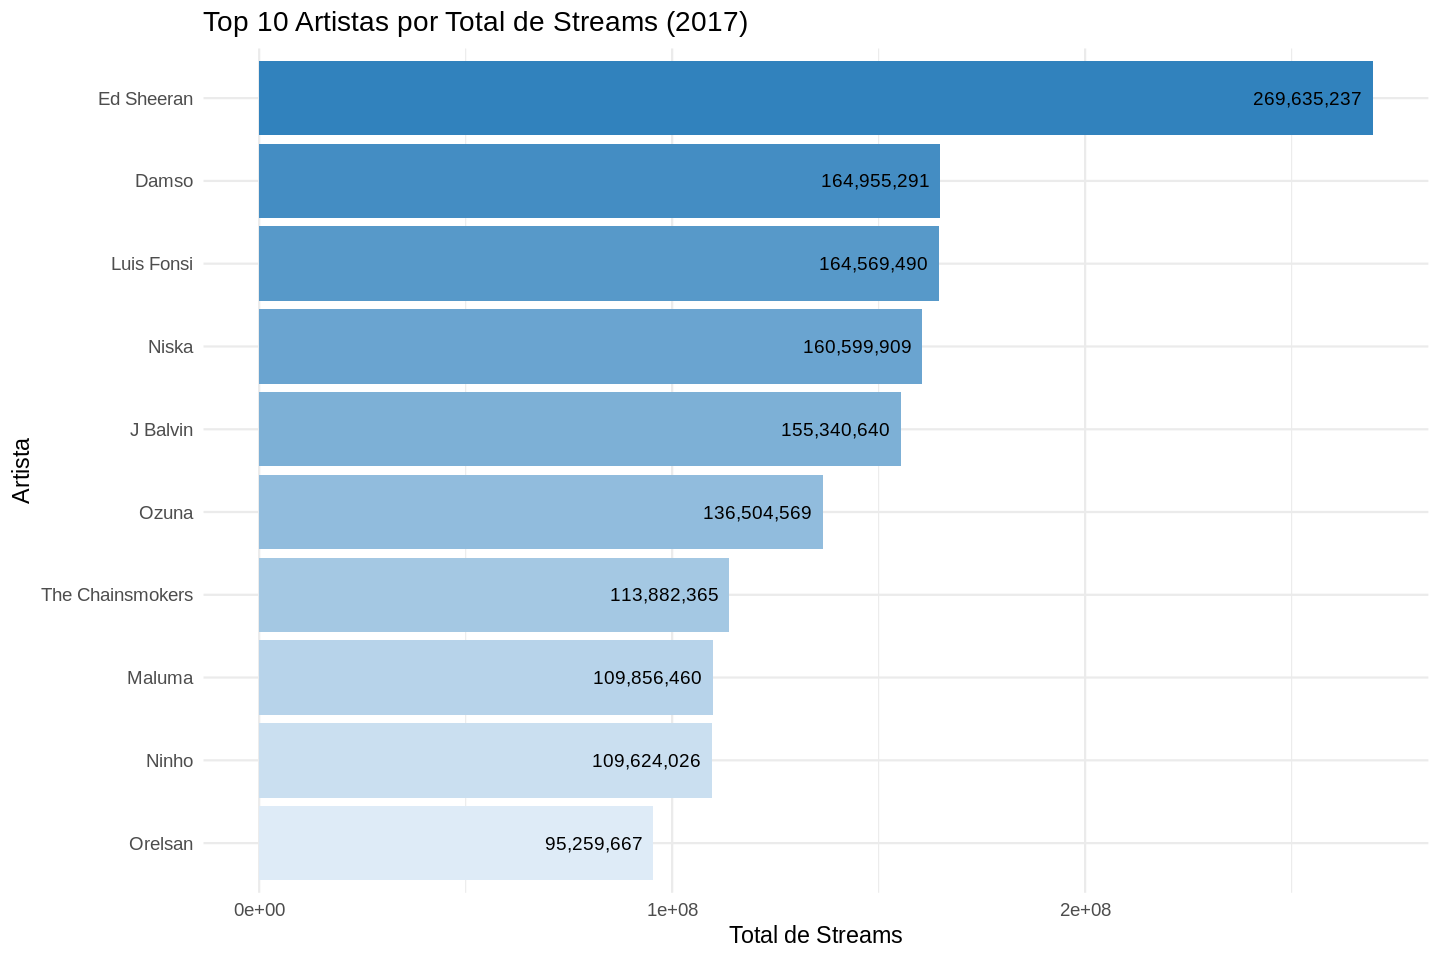

In [ ]:
top_artistas_streams <- spotify %>%
  group_by(Artist) %>%
  summarise(total_streams = sum(Streams, na.rm = TRUE)) %>%
  arrange(desc(total_streams)) %>%
  slice_head(n = 10)

top_artistas_streams <- top_artistas_streams %>%
  mutate(Artist = factor(Artist, levels = rev(Artist)))


azuis <- colorRampPalette(c("#deebf7", "#3182bd"))(10)

ggplot(top_artistas_streams, aes(x = Artist, y = total_streams, fill = Artist)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = scales::comma(total_streams)),
            hjust = 1.1, color = "black", size = 4) +
  labs(title = "Top 10 Artistas por Total de Streams (2017)",
       x = "Artista", y = "Total de Streams") +
  scale_fill_manual(values = azuis) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none") +
  coord_flip()

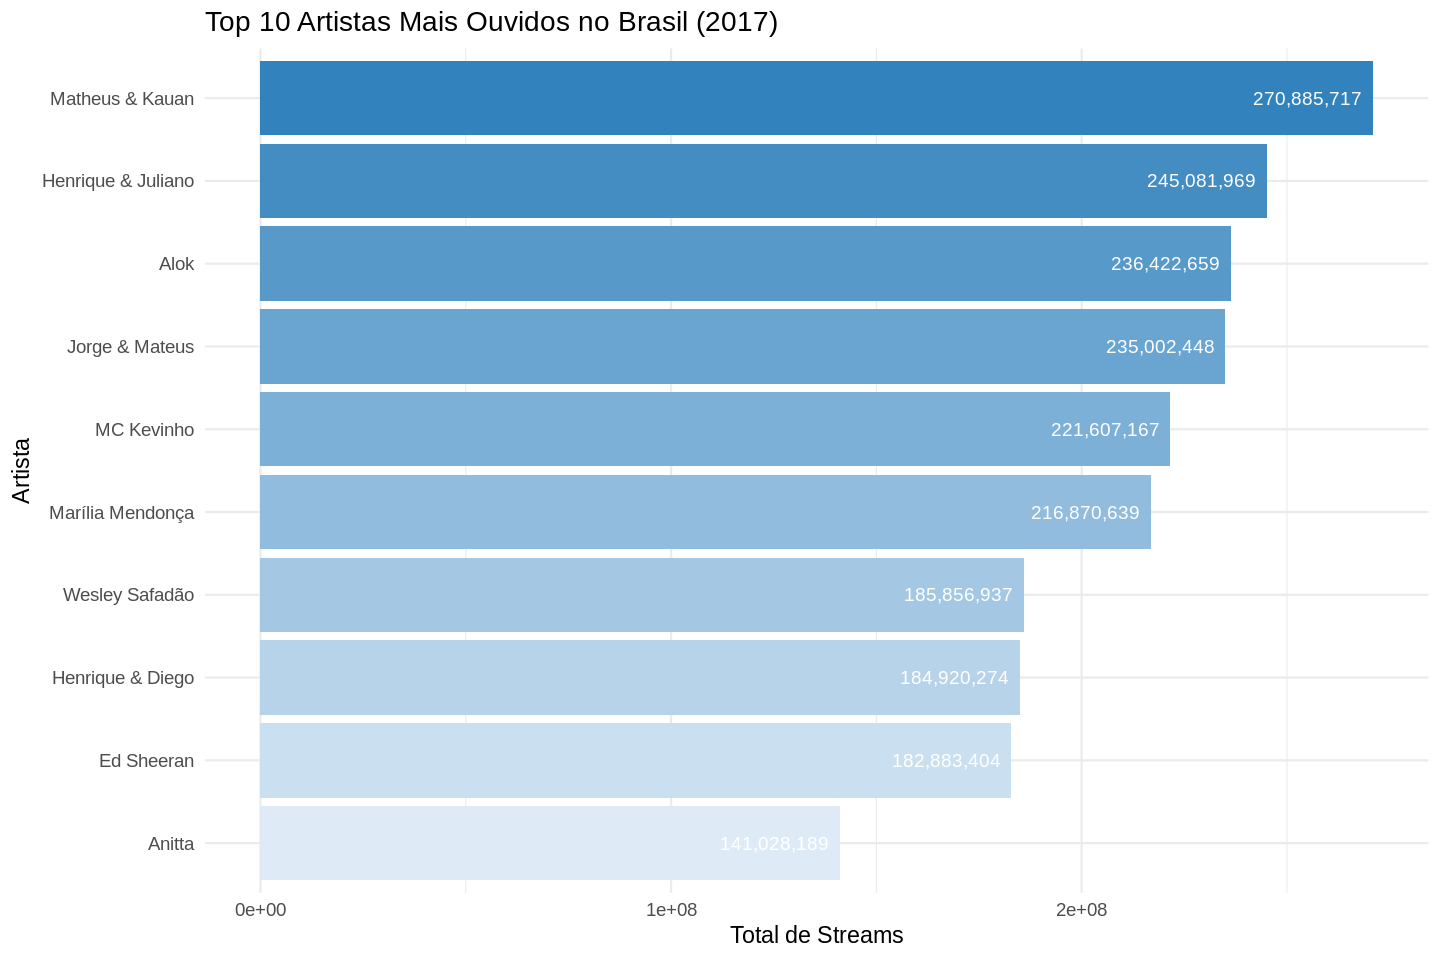

In [ ]:
top_artistas_br <- spotify %>%
  filter(tolower(Region) == "br") %>%
  group_by(Artist) %>%
  summarise(Total_Streams = sum(Streams, na.rm = TRUE)) %>%
  arrange(desc(Total_Streams)) %>%
  slice_head(n = 10)

top_artistas_br$Artist <- factor(top_artistas_br$Artist, levels = rev(top_artistas_br$Artist))
azuis <- colorRampPalette(c("#deebf7", "#3182bd"))(10)

ggplot(top_artistas_br, aes(x = Artist, y = Total_Streams, fill = Artist)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = scales::comma(Total_Streams)),
            hjust = 1.1, color = "white", size = 4) +
  coord_flip() +
  labs(
    title = "Top 10 Artistas Mais Ouvidos no Brasil (2017)",
    x = "Artista",
    y = "Total de Streams"
  ) +
  scale_fill_manual(values = azuis) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none")




In [ ]:
azuis <- colorRampPalette(c("#deebf7", "#3182bd"))(10)


top_tracks_br <- spotify %>%
  filter(tolower(Region) == "br") %>%
  group_by(Track.Name) %>%
  summarise(Total_Streams = sum(Streams, na.rm = TRUE)) %>%
  arrange(desc(Total_Streams)) %>%
  slice_head(n = 10) %>%
  mutate(Track.Name = factor(Track.Name, levels = rev(Track.Name)))

p_br <- ggplot(top_tracks_br, aes(x = Track.Name, y = Total_Streams, fill = Track.Name)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Top 10 Músicas Mais Ouvidas no Brasil (2017)",
       x = "Música", y = "Total de Streams") +
  scale_fill_manual(values = azuis) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none")

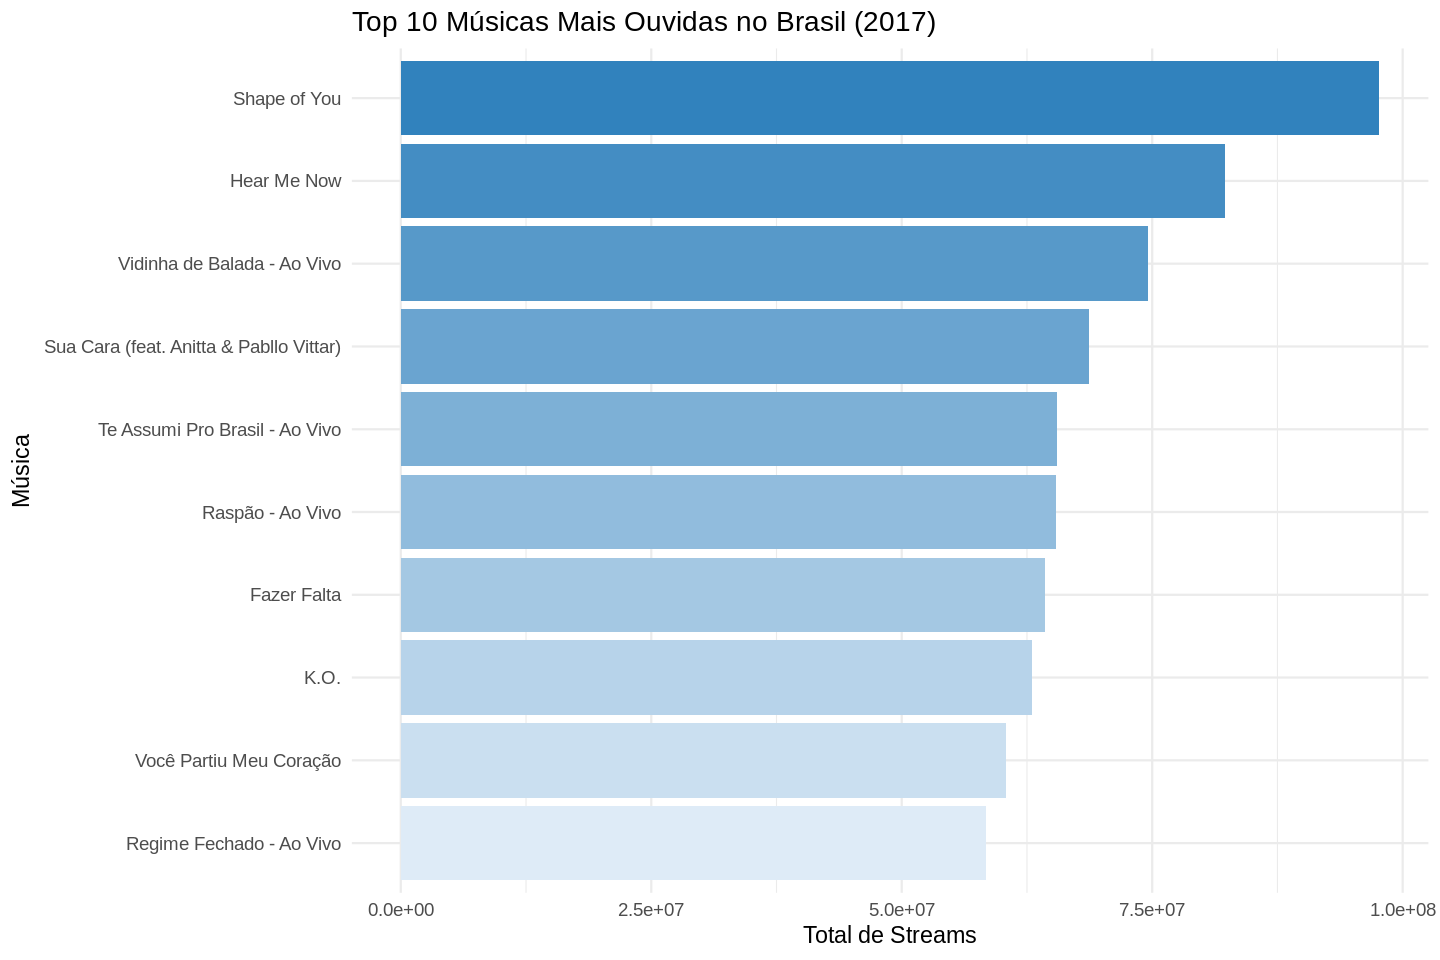

In [ ]:
print(p_br)

In [ ]:
top_tracks_world <- spotify %>%
  group_by(Track.Name) %>%
  summarise(Total_Streams = sum(Streams, na.rm = TRUE)) %>%
  arrange(desc(Total_Streams)) %>%
  slice_head(n = 10) %>%
  mutate(Track.Name = factor(Track.Name, levels = rev(Track.Name)))
p_world <- ggplot(top_tracks_world, aes(x = Track.Name, y = Total_Streams, fill = Track.Name)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Top 10 Músicas Mais Ouvidas no Mundo (2017)",
       x = "Música", y = "Total de Streams") +
  scale_fill_manual(values = azuis) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none")

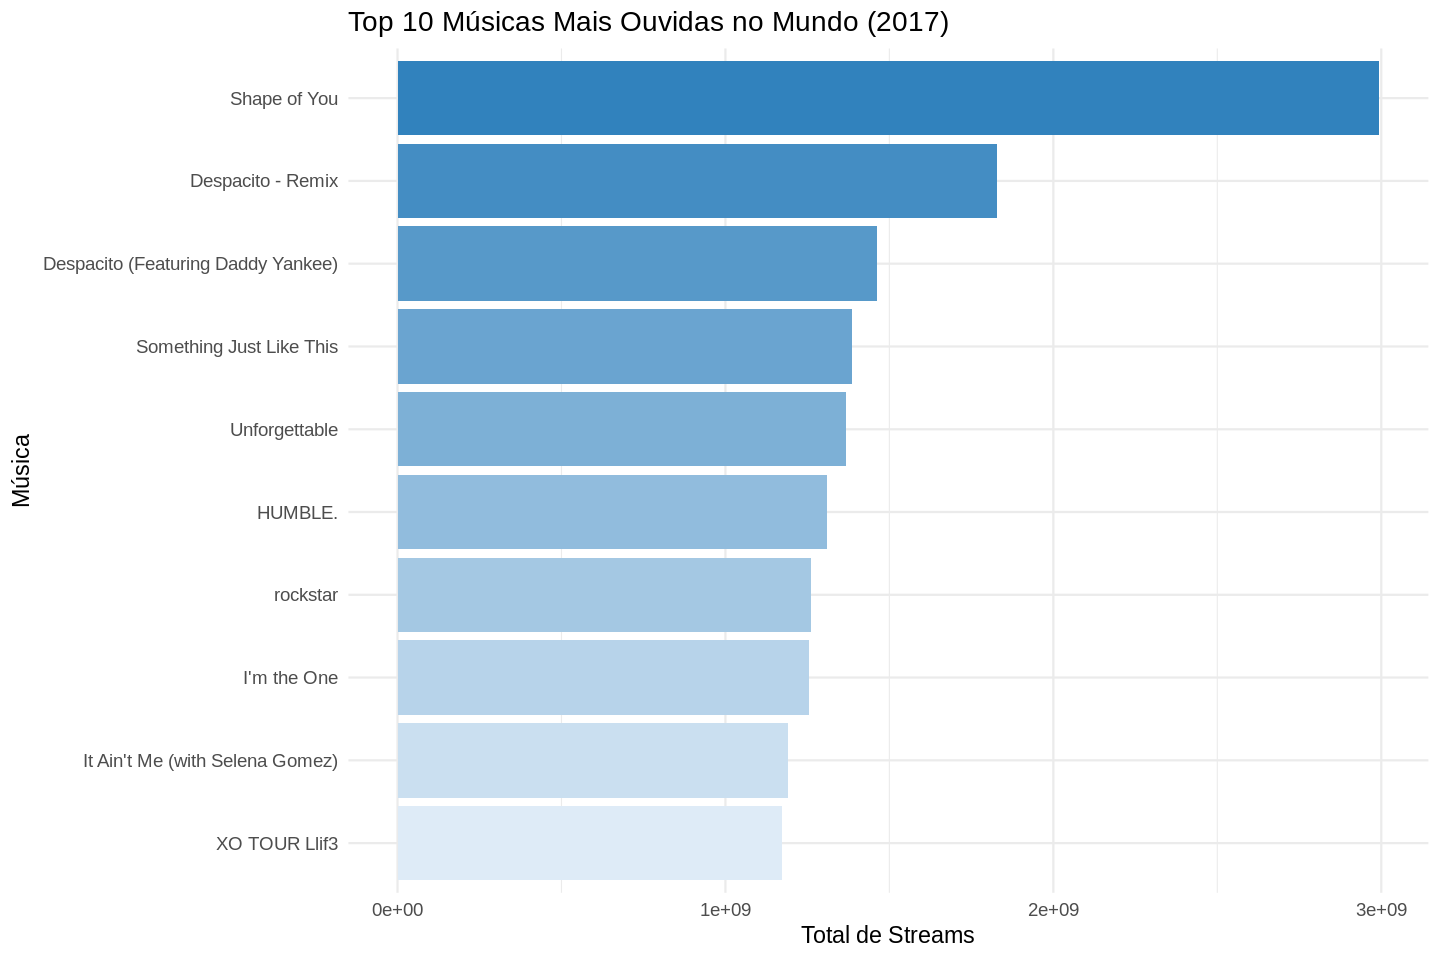

In [ ]:
print(p_world)

In [ ]:
spotify$Date <- as.Date(spotify$Date)


top_musicas_dias <- function(df, region = NULL, top_n = 10) {
  data <- df %>%
    filter(Position <= 100)

  if (!is.null(region)) {
    data <- data %>% filter(tolower(Region) == tolower(region))
  }

  dias_musicas <- data %>%
    group_by(Track.Name) %>%
    summarise(Dias_no_top100 = n_distinct(Date)) %>%
    arrange(desc(Dias_no_top100)) %>%
    slice_head(n = top_n)


  dias_musicas$Track.Name <- factor(dias_musicas$Track.Name, levels = rev(dias_musicas$Track.Name))

  return(dias_musicas)
}

# Top 10 músicas Brasil e Mundo
top10_br <- top_musicas_dias(spotify, region = "br", top_n = 15)
top10_world <- top_musicas_dias(spotify, region = NULL, top_n = 15)




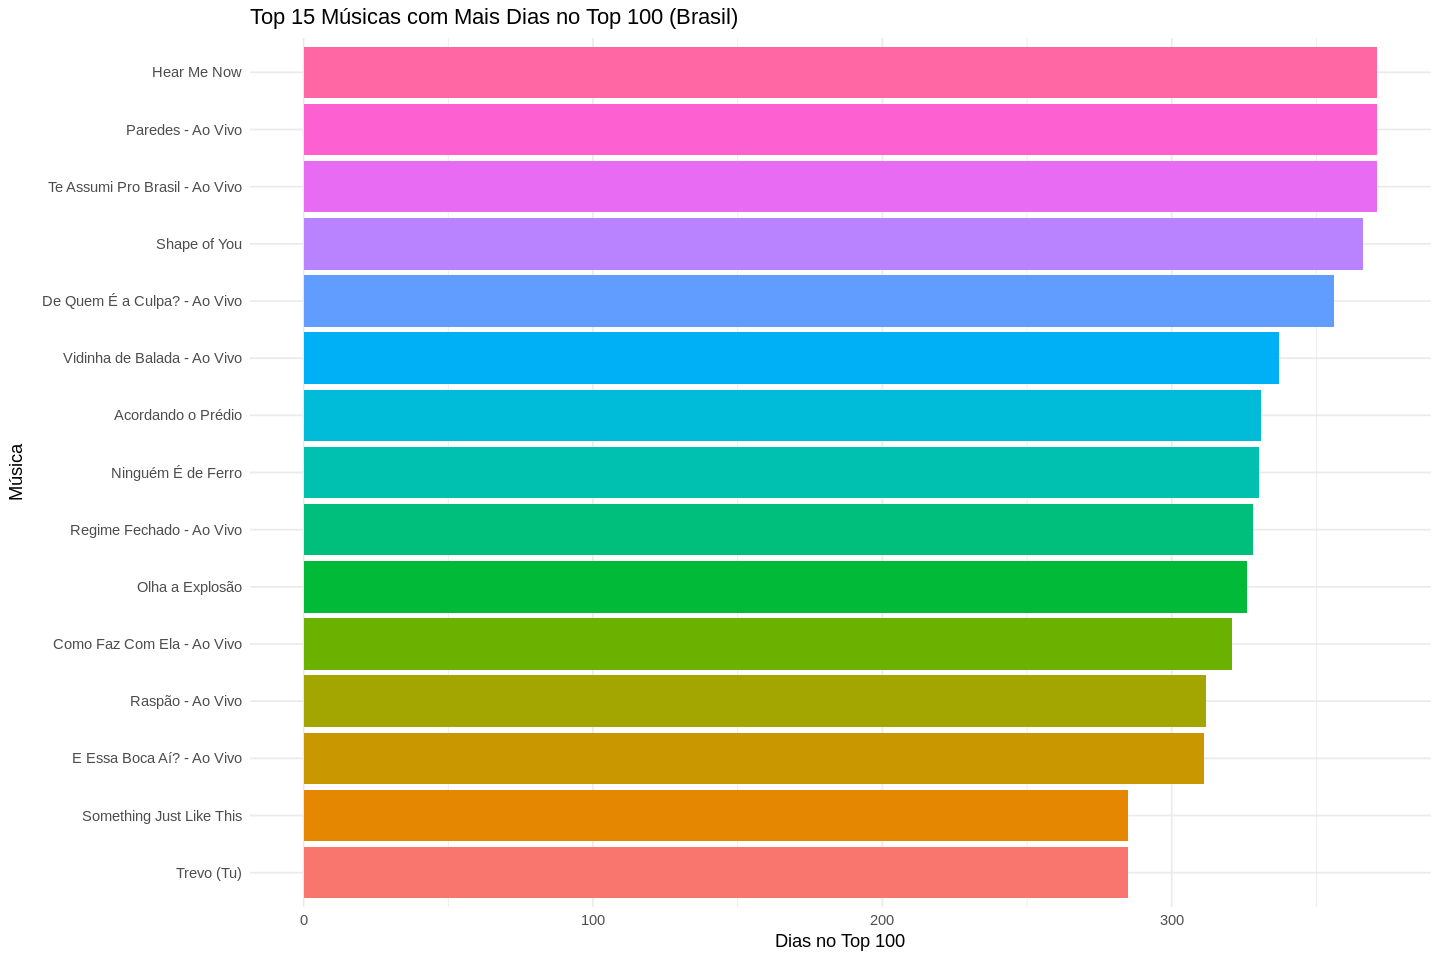

In [ ]:
ggplot(top10_br, aes(x = Track.Name, y = Dias_no_top100, fill = Track.Name)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Top 15 Músicas com Mais Dias no Top 100 (Brasil)",
       x = "Música",
       y = "Dias no Top 100") +
  theme_minimal() +
  theme(legend.position = "none")

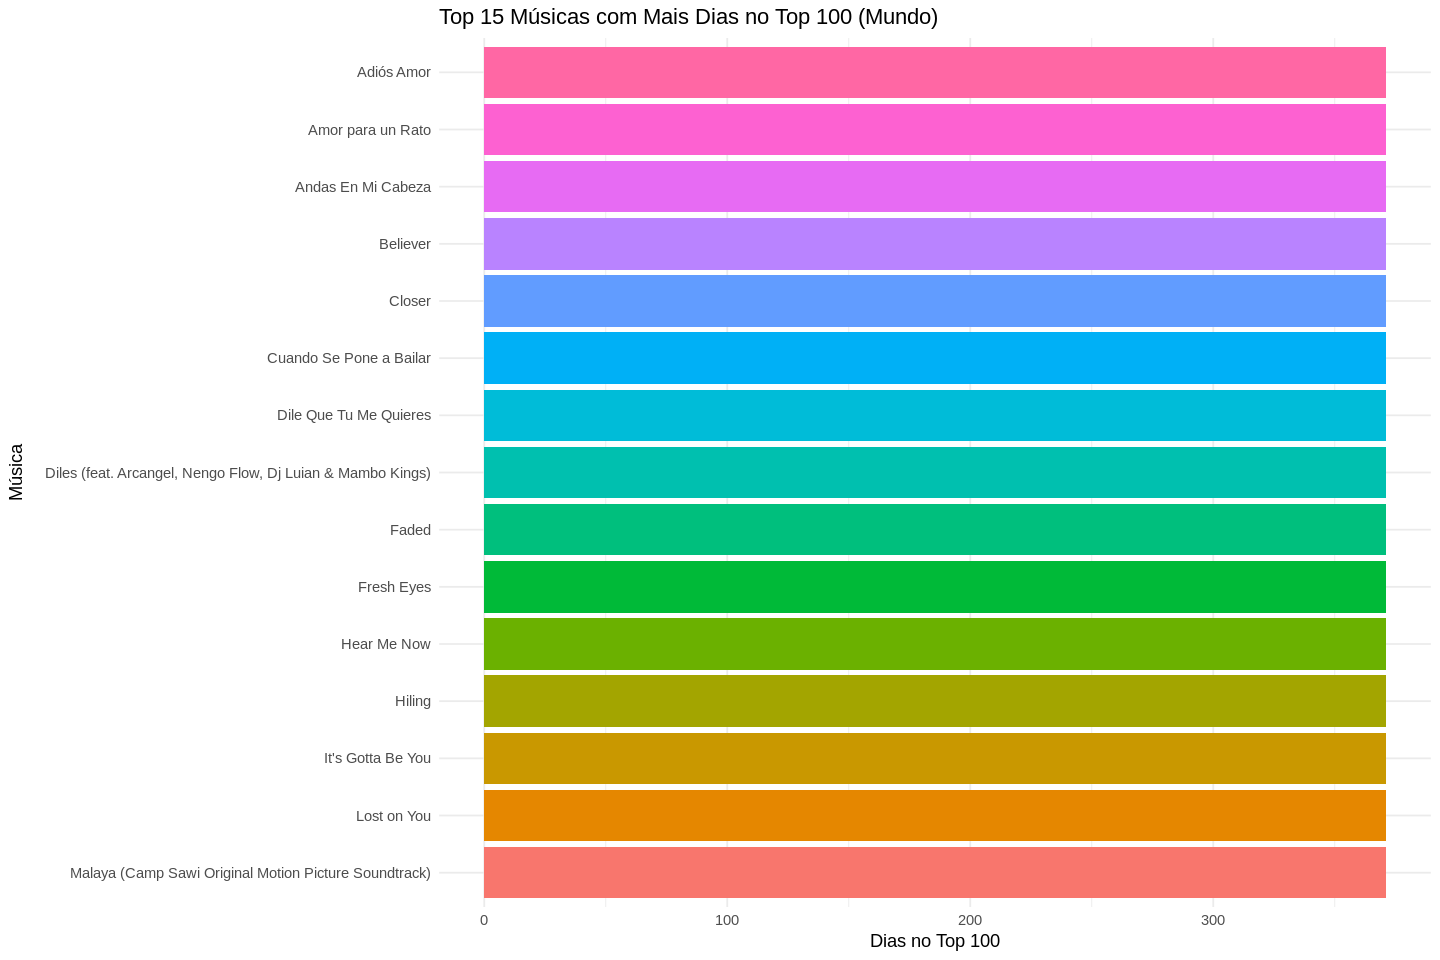

In [ ]:
ggplot(top10_world, aes(x = Track.Name, y = Dias_no_top100, fill = Track.Name)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Top 15 Músicas com Mais Dias no Top 100 (Mundo)",
       x = "Música",
       y = "Dias no Top 100") +
  theme_minimal() +
  theme(legend.position = "none")

Ao analisar o gráfico das top 15 músicas globais, tive estranheza inicialmente, pois parecia pouco provável que todas as músicas tivessem exatamente a mesma quantidade de dias no top 100. No entanto, considerando a natureza do Spotify, que frequentemente promove playlists e rankings com músicas altamente populares, é plausível que essas faixas permaneçam simultaneamente no topo durante períodos semelhantes. Isso acontece porque o algoritmo da plataforma tende a reforçar o sucesso das músicas mais ouvidas, mantendo-as visíveis e acessíveis para grande parte dos usuários, o que resulta em uma permanência prolongada e parecida no ranking. Além disso, a sincronização do ciclo de lançamentos e tendências musicais globais pode fazer com que várias músicas compartilhem uma trajetória de popularidade similar. Portanto, esse empate no número de dias no top 100 reflete o funcionamento e as estratégias da plataforma em destacar hits que dominam o cenário musical em determinado período.



Para aprofundar essa análise, contabilizei o número de dias que cada música permaneceu no top 100. De fato, observei que todas as músicas alcançaram o mesmo número de dias durante o ano inteiro. Diante disso, considerei que não faz sentido remover esses dados, pois eles refletem a própria natureza da plataforma e não indicam um viés nos dados.

In [ ]:
top15_world <- spotify %>%
  filter(Position <= 100) %>%
  group_by(Track.Name) %>%
  summarise(Dias_no_top100 = n_distinct(Date)) %>%
  arrange(desc(Dias_no_top100)) %>%
  slice_head(n = 15)

print(top15_world)

# A tibble: 15 × 2
   Track.Name                                                 Dias_no_top100
   <chr>                                                               <int>
 1 Adiós Amor                                                            371
 2 Amor para un Rato                                                     371
 3 Andas En Mi Cabeza                                                    371
 4 Believer                                                              371
 5 Closer                                                                371
 6 Cuando Se Pone a Bailar                                               371
 7 Dile Que Tu Me Quieres                                                371
 8 Diles (feat. Arcangel, Nengo Flow, Dj Luian & Mambo Kings)            371
 9 Faded                                                                 371
10 Fresh Eyes                                                            371
11 Hear Me Now                                           

In [ ]:

top15_world <- spotify %>%
  filter(Position <= 100) %>%
  group_by(Track.Name) %>%
  summarise(Dias_no_top100 = n_distinct(Date)) %>%
  arrange(desc(Dias_no_top100)) %>%
  slice_head(n = 15)

top15_tracks <- top15_world$Track.Name

paises_top15 <- spotify %>%
  filter(Track.Name %in% top15_tracks) %>%
  distinct(Track.Name, Region) %>%  # contar só uma vez por música e região
  count(Region) %>%
  arrange(desc(n))

print(paises_top15)


   Region n
1      ar 9
2      uy 9
3      bo 8
4      cl 8
5      co 8
6      cr 8
7      ec 8
8      es 8
9  global 8
10     gt 8
11     hn 8
12     mx 8
13     pe 8
14     ph 8
15     py 8
16     sv 8
17     at 7
18     cz 7
19     do 7
20     it 7
21     nl 7
22     pa 7
23     pt 7
24     se 7
25     au 6
26     be 6
27     ca 6
28     ch 6
29     de 6
30     dk 6
31     gb 6
32     hu 6
33     id 6
34     ie 6
35     my 6
36     nz 6
37     pl 6
38     sg 6
39     tr 6
40     tw 6
41     fi 5
42     fr 5
43     hk 5
44     lv 5
45     no 5
46     sk 5
47     br 4
48     ee 4
49     gr 4
50     jp 4
51     lt 4
52     us 4
53     is 3
54     lu 2


Outra relação curiosa que encontrei enquanto analisava os dados é que o top 15 músicas com mais tempo no top 100 é composto majoritariamente por músicas de países que falam espanhol, sendo essa relação de 9 entre as 15 músicas totais. O que pode parecer a principio contraintuivo visto que o inglês é considerado a língua universal, logo músicas nesse idioma deveriam ser as mais ouvidas.

No entanto, ao realizar uma contagem de quantas músicas um país possui no top 100, obtive valores congruentes: os 8 primeiros países são hispanofalantes. Dessa forma, a predominância de músicas em espanhol não é um acaso, mas sim um reflexo do consumo musical atual e das tendências globais impulsionadas por esses mercados.

## Machine Learning

Com o objetivo de identificar agrupamentos naturais entre as músicas optei por realizar uma clusterização na base de dados.


In [6]:
##dupliquei a base para o tratamento de dados

spotify_clean <- spotify %>%
  distinct() %>%  # removi linhas duplicadas
  select(Track.Name, Artist, Streams, Region, Date)

In [7]:
##Estou selecionando aqui apenas as variáveis númericas e removendo as demais

musicas_dias <- spotify_clean %>%
  group_by(Track.Name, Artist) %>%
  summarise(
    Dias_no_top100 = n_distinct(Date),
    Total_streams = sum(Streams, na.rm = TRUE),
    Qtd_regioes = n_distinct(Region),
    .groups = 'drop'
  )


In [8]:
#normalização de dados

musicas_numericas <- musicas_dias %>%
  select(Dias_no_top100, Total_streams, Qtd_regioes)

musicas_normalizadas <- as.data.frame(scale(musicas_numericas))


In [9]:
musicas_cluster_input <- bind_cols(
  musicas_dias %>% select(Track.Name, Artist),
  musicas_normalizadas
)

In [ ]:
##Para definir a quantidade de clsuter irei utilizar o Método do Cotovelo

set.seed(123)


wss <- sapply(1:10, function(k){
  kmeans(musicas_normalizadas, centers = k, nstart = 10)$tot.withinss
})


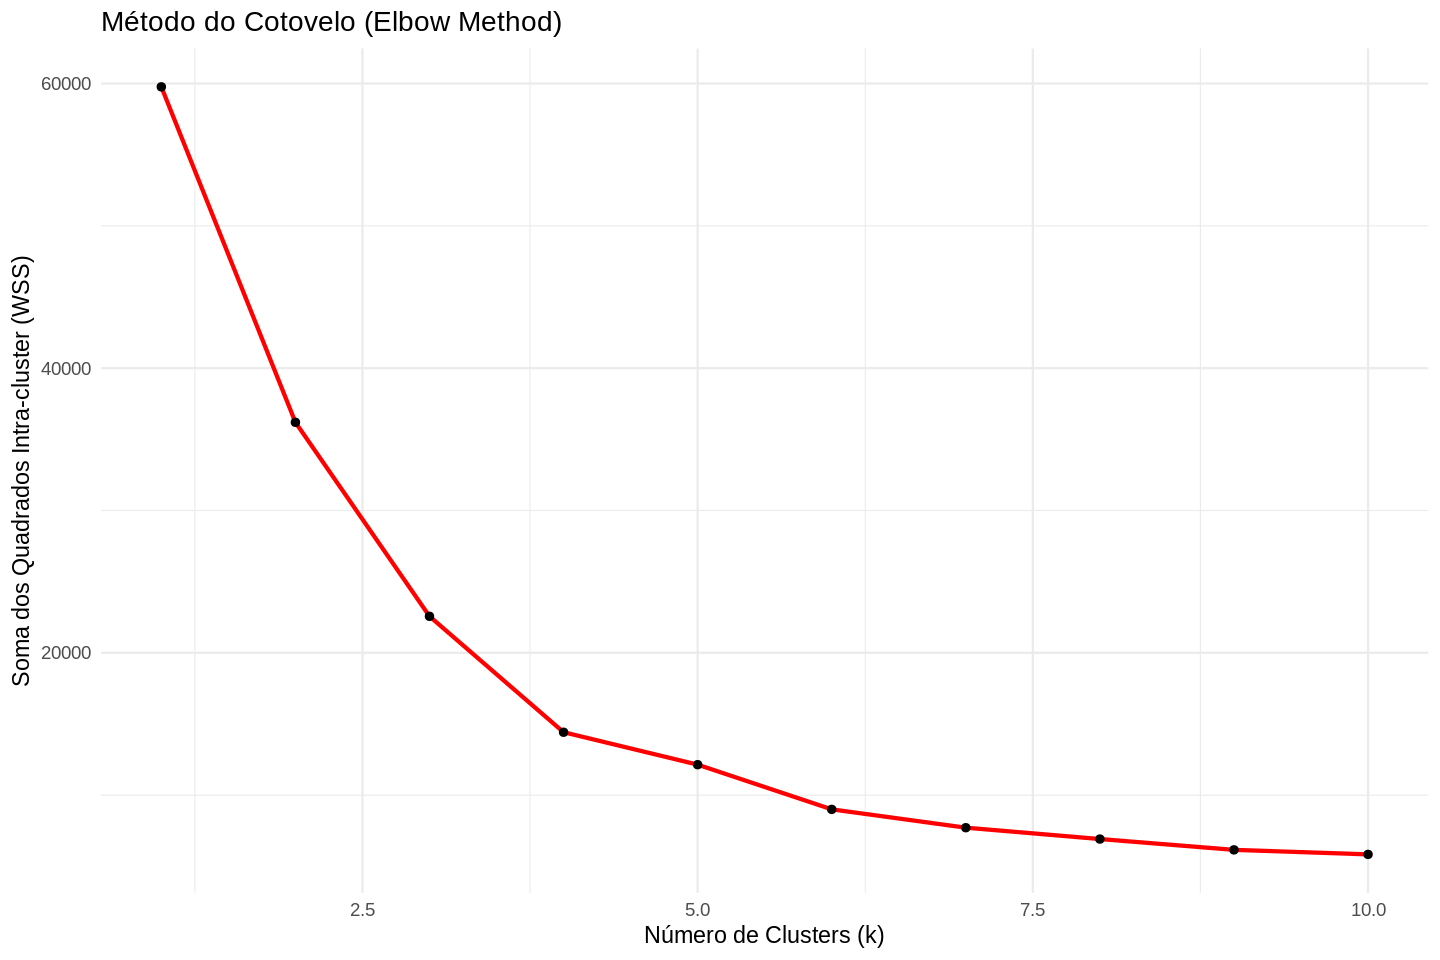

In [ ]:
elbow_df <- data.frame(k = 1:10, wss = wss)

ggplot(elbow_df, aes(x = k, y = wss)) +
  geom_line(color = "red", size = 1.2) +
  geom_point(size = 2) +
  labs(title = "Método do Cotovelo (Elbow Method)",
       x = "Número de Clusters (k)",
       y = "Soma dos Quadrados Intra-cluster (WSS)") +
  theme_minimal(base_size = 14)


##Análise do Método do Cotovelo
Podemos observar que a partir de k = 3 o WSS reduz significativamente. Portanto utilizarei esse ponto na criação dos kmeans

In [10]:
set.seed(123)

kmeans_result <- kmeans(musicas_normalizadas, centers = 3, nstart = 25)

musicas_clusterizadas <- musicas_normalizadas %>%
  mutate(Cluster = as.factor(kmeans_result$cluster))


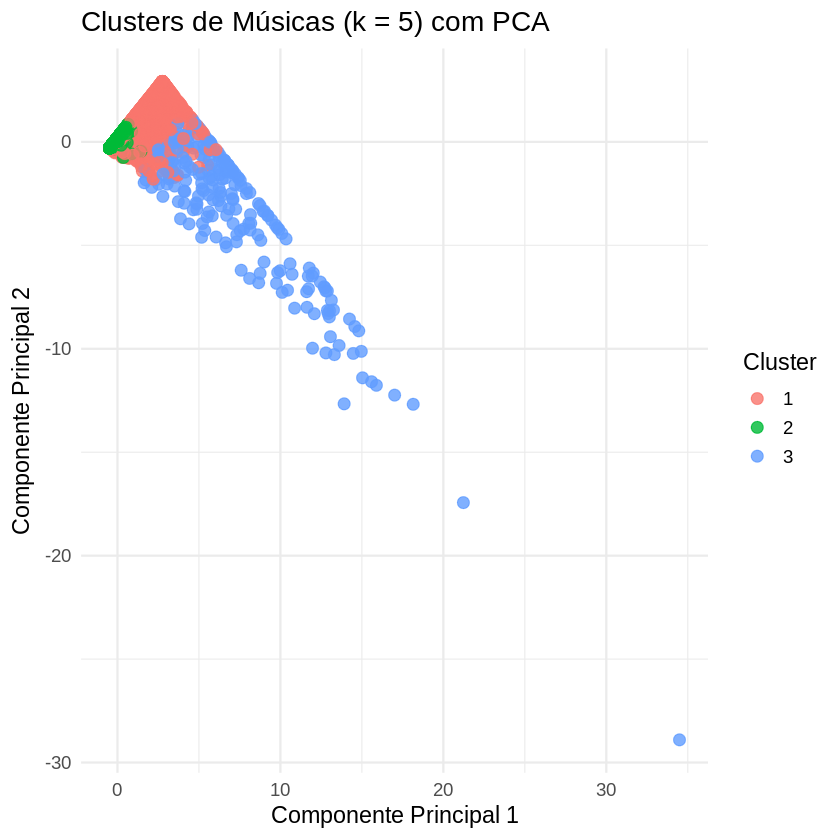

In [11]:

pca_result <- prcomp(musicas_normalizadas[, -ncol(musicas_normalizadas)], scale. = TRUE)
pca_df <- data.frame(pca_result$x[, 1:2], Cluster = musicas_clusterizadas$Cluster)


ggplot(pca_df, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(title = "Clusters de Músicas (k = 3) com PCA",
       x = "Componente Principal 1",
       y = "Componente Principal 2") +
  theme_minimal(base_size = 14)


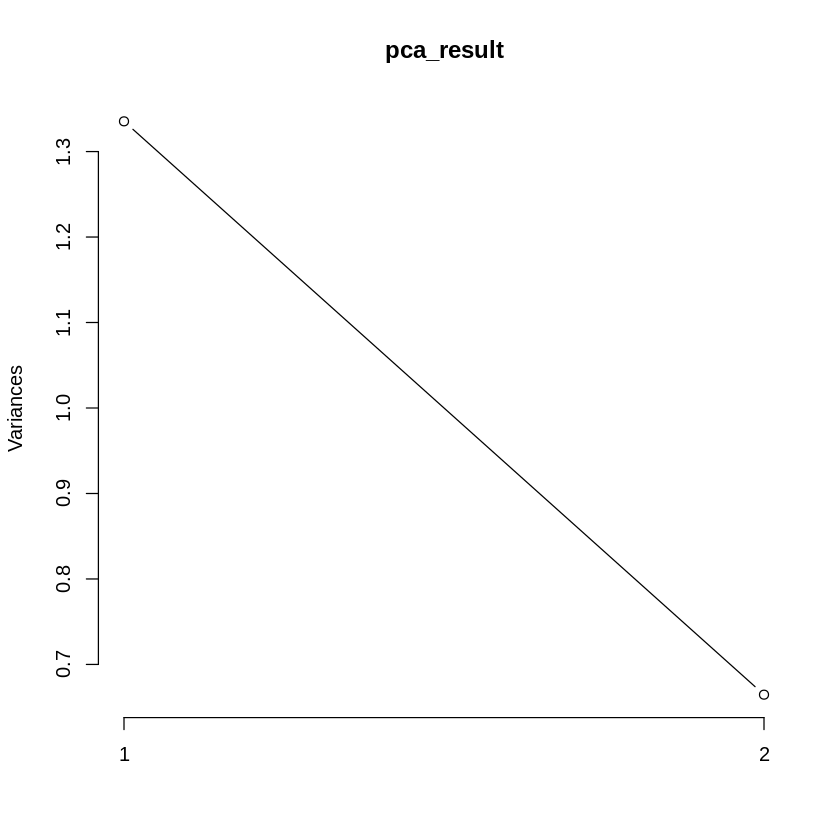

In [12]:
plot(pca_result, type = "l")


Nota-se que ao utilizar o número de streams como indicador numérico e padronizar os dados, temos que o cluster 3 (azul) se estende amplamente, possuindo o maior range de variação e incluindo outliers, que reflete músicas com streams extremamente acima da média, como a música "Shape of You", cujo número de streams foi muito maior que o segundo colocado na lista, isso pode indicar músicas com valores de streams extremamente baixos ou extremamente altos. Quanto aos Clusters 1 (vermelho) e 2 (verde), notamos que há pouca variação entre eles, e que eles ocupam praticamente a mesma região no gráfico, inclusive com overclusting, um indicativo de que eles possuem características extremamente semelhantes, como presença comum no top 100 e streams medianas.
A melhor opção neste caso seria utilizar outro variável na clusterização, como gênero musical, no entanto, esta base não dispõe dessa informação.



Call:
glm(formula = Sucesso ~ Streams, family = binomial, data = treino)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.897e+00  2.731e-03 -1060.8   <2e-16 ***
Streams      1.209e-06  7.809e-09   154.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1207573  on 2752956  degrees of freedom
Residual deviance: 1184506  on 2752955  degrees of freedom
AIC: 1184510

Number of Fisher Scoring iterations: 5


       Real
Predito      0      1
      0 648892  38328
      1    260    760


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC no conjunto teste: 0.7067965 


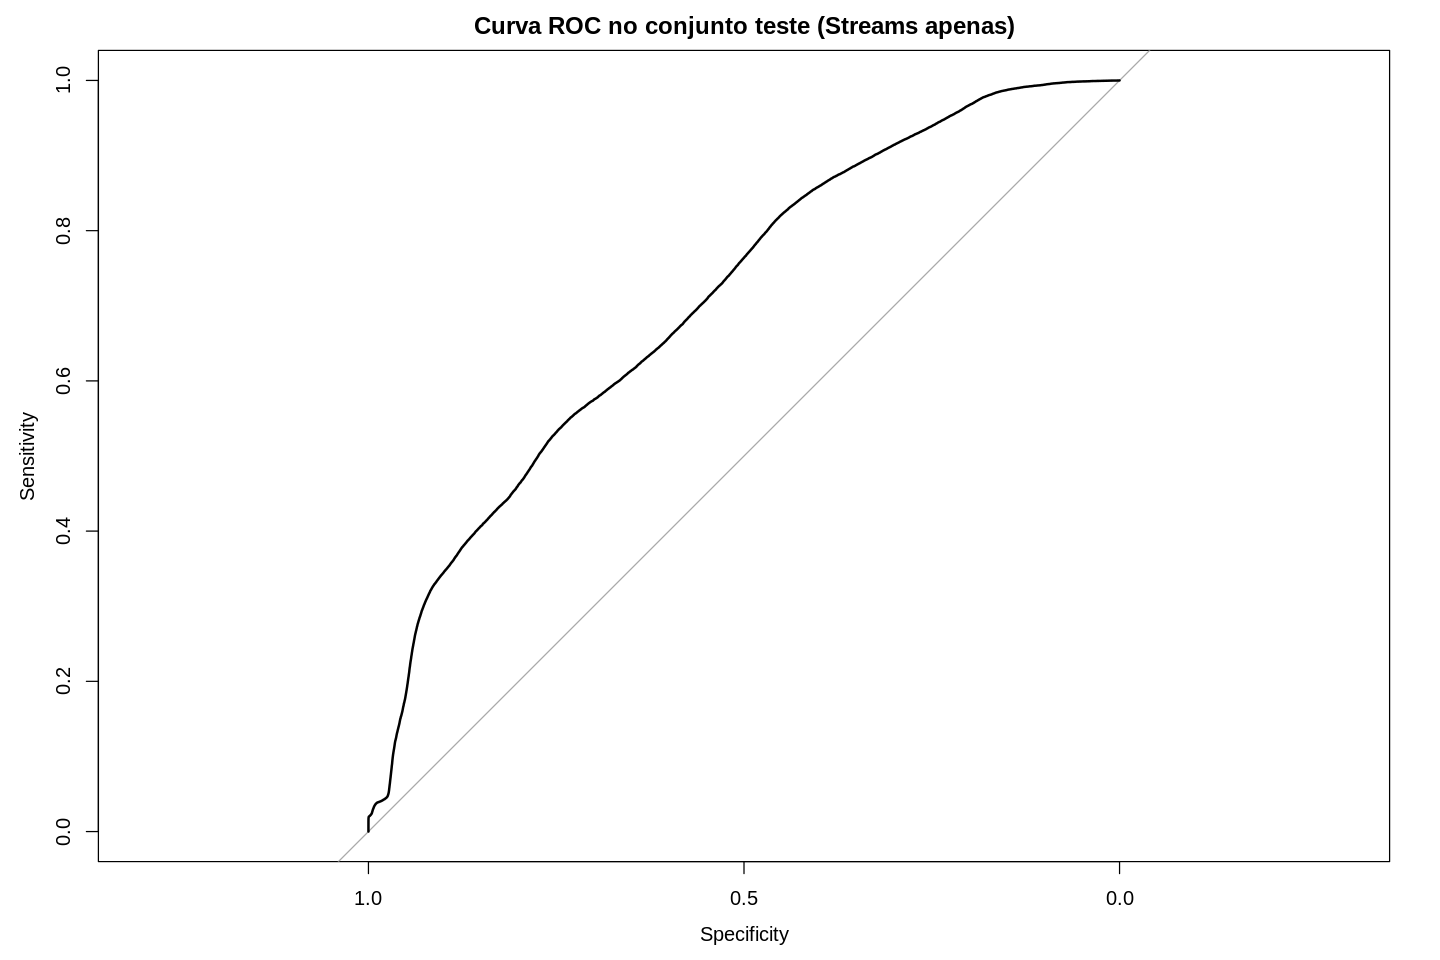

In [76]:
##Por fim, criei um modelo de regressão para verificar se é possível prever se uma música terá sucesso ou não

install.packages("caret")
install.packages("pROC")
library(caret)
library(pROC)

# Criei variável alvo Sucesso (1 se Position <= 10, senão 0)
spotify_clean <- spotify_clean %>%
  mutate(Sucesso = ifelse(Position <= 10, 1, 0))

# Dividi base em treino (80%) e teste (20%)
set.seed(123)
n <- nrow(spotify_clean)
indices_treino <- sample(1:n, size = 0.8 * n, replace = FALSE)
treino <- spotify_clean[indices_treino, ]
teste <- spotify_clean[-indices_treino, ]

# Treinar modelo de regressão logística usando apenas Streams
modelo <- glm(Sucesso ~ Streams, family = binomial, data = treino)


summary(modelo)


probs_teste <- predict(modelo, newdata = teste, type = "response")

pred_teste <- ifelse(probs_teste > 0.5, 1, 0)


matriz_confusao <- table(Predito = pred_teste, Real = teste$Sucesso)
print(matriz_confusao)

roc_obj <- roc(teste$Sucesso, probs_teste)
cat("AUC no conjunto teste:", auc(roc_obj), "\n")

plot(roc_obj, main = "Curva ROC no conjunto teste (Streams apenas)")


##Avaliação do Modelo

O modelo apresentou um AIC de 0.71, que considerei satisfatório dada a simplicidade dos dados e do modelo em si. Intuitivamente, o modelo indicou que quanto maior o número de streams, maior a chance de sucesso de uma música, no entanto a falta de outros dados como gênero e país e tempo de lançamento encarecem a análise, impossibilitando um estudo mais aprofundado sobre as chances de sucessos de uma música.

##Conclusões Finais

1. A maioria das músicas do Top 100 compartilha características similares, o que explica a formação de poucos clusters representativos.

2. É possível prever com aceitável grau de confiança se uma música tem potencial de sucesso, mas o sucesso extremo ainda depende de fatores exógenos (marketing, artista, contexto cultural).

3. O modelo de regressão pode ser uma boa base para sistemas de recomendação ou scouting musical, auxiliando gravadoras e produtores na curadoria de novos talentos.

4. A clusterização pode servir para segmentar músicas por perfil sonoro, facilitando estratégias de playlisting ou campanhas direcionadas por estilo.

5. O mercado de falantes da língua espanhola é extremamente bem sucedido, ocupando diversas posições dentro do top 100. Indicativo forte da influência da música latina no cenário global.

6. Para uma análise mais aprofundada, outras variáveis se fazem necessárias. De modo a deixar a previsão de sucesso simplória.